In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('unsupervised(elian).csv')

In [3]:
df.drop(['cluster'],axis=1, inplace=True)

In [4]:
df.isnull().sum()

price                           0
availability_365                0
room_type                       0
review_scores_rating            0
neighbourhood_group_cleansed    0
dtype: int64

In [5]:
df.head()

,price,availability_365,room_type,review_scores_rating,neighbourhood_group_cleansed
0,48.0,365,Private room,4.60,East Region
1,60.0,244,Private room,4.69,North-East Region
2,50.0,365,Private room,4.70,East Region
3,200.0,362,Entire home/apt,4.93,East Region
4,60.0,239,Private room,4.81,North-East Region


In [6]:
df.dropna()
df.isnull().sum()

price                           0
availability_365                0
room_type                       0
review_scores_rating            0
neighbourhood_group_cleansed    0
dtype: int64

In [7]:
roomtype_map = {'Private room': 0, 'Entire home/apt': 1}
neighbourhood_map = {'North Region': 0, 'East Region': 1, 'North-east Region': 2, 'West Region': 3}

df['roomtype'] = df['room_type'].map(roomtype_map)
df['neighbourhood'] = df['neighbourhood_group_cleansed'].map(neighbourhood_map)

In [8]:
features = ['price', 'availability_365', 'roomtype', 'neighbourhood']
X = df[features].dropna()

In [9]:
df.drop(['room_type', 'neighbourhood_group_cleansed'], axis=1, inplace=True)

In [10]:
df.to_csv('cleaned_unsupervised.csv', index=False)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)

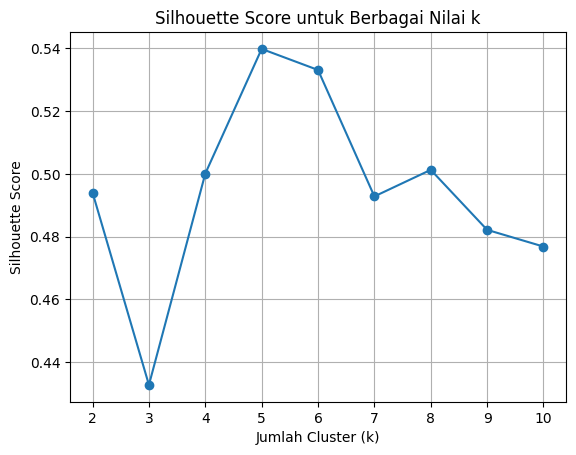

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Score untuk Berbagai Nilai k")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [14]:
best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print("Best k:", best_k)

Best k: 5


In [15]:
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
cluster_summary = X.groupby('cluster').mean()
print(cluster_summary)

              price  availability_365  roomtype  neighbourhood
cluster                                                       
0        110.360000        105.840000       0.0       1.240000
1         84.659574        312.063830       0.0       3.000000
2        105.051724        332.965517       0.0       0.758621
3        187.461538        305.384615       1.0       0.769231
4        413.666667        363.533333       1.0       3.000000


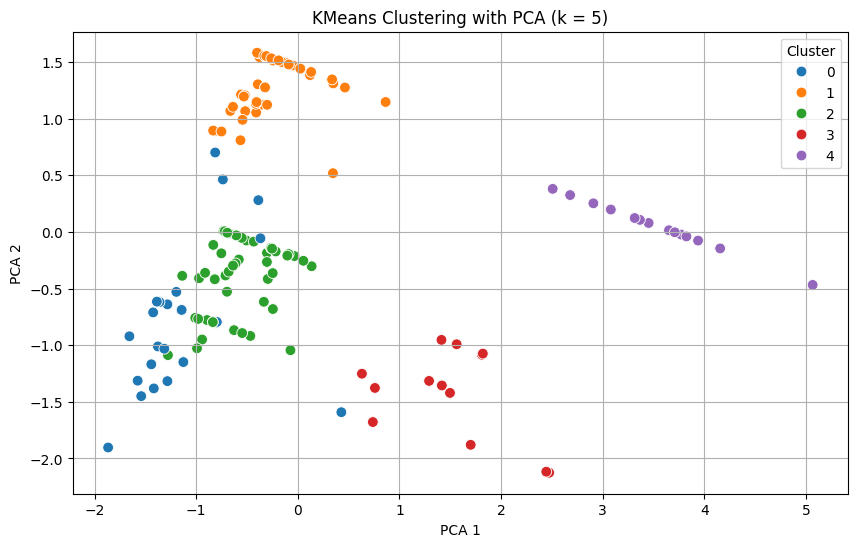

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering with PCA (k = {best_k})')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()
